# Linear regression as a statistical estimation problem
### Institut des Algorithmes du Sénégal (07/08/2021)

---

This notebook demonstrates linear regression as a statistical estimation problem. We will see how to do the following as part of a linear regression modeling,

- Compute statistical properties like standard error, t-statistic, and p-values of the regression coefficients
- Compute F-statistic of the overall regression and infer from the F-test
- Compute $R^2$ and Adjusted-$R^2$ from first principle/definition
- Plot residuals vs. fitted and residuals vs. predictors to check assumptions of linearity and homoscedasticity
- Histogram and Q-Q plot of the standardized residuals to check Normality assumption

The dataset is taken from UCI ML repository. We chose the slump test dataset.
<br>Here is the link: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

We will use a new Python library for these analyses: `MLR`. 
<br>You can read the documentation of this library here: https://mlr.readthedocs.io/en/latest/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Read the dataset

In [3]:
df = pd.read_csv("slump_test.csv",sep=',')

In [4]:
df.drop('No',axis=1,inplace=True)

In [5]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [6]:
df.shape

(103, 10)

### Import `MyLinearRegression` from MLR and fit

To fit data from a Pandas DataFrame, just pass on the list of the names of the columns you want to use as predictors, and the name of the response variable column as a string. 

In [9]:
#!pip install mlr

In [10]:
from mlr.MLR import MyLinearRegression as mlr

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
m = mlr()

In [12]:
predictors = list(df.columns[:7])

In [13]:
print(predictors)

['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.', 'Fine Aggr.']


In [14]:
response = 'Compressive Strength (28-day)(Mpa)'

In [15]:
m.fit_dataframe(X=predictors,y=response,dataframe=df)

### Print all the coefficients and the intercept

In [16]:
m.coef_

array([ 0.06141322, -0.02970752,  0.05052611, -0.23269505,  0.10314991,
       -0.05562163, -0.03908287])

In [17]:
m.intercept_

139.7814998482354

### Print metrics

In [18]:
print ("R-squared: ",m.r_squared())
print ("Adjusted R-squared: ",m.adj_r_squared())
print("MSE: ",m.mse())

R-squared:  0.8968376098140092
Adjusted R-squared:  0.8892361705371468
MSE:  6.2765436103094165


### All metrics at once!

In [19]:
m.print_metrics()

sse:     646.4840
sst:     6266.6636
mse:     6.2765
r^2:     0.8968
adj_r^2: 0.8892
AIC:     497.4937
BIC:     518.5716


### Compute $R^2$ and adjusted-$R^2$ from their definition

$R^2$ is a basic metric which tells you about that **how much variance is been explained by the model**. It is calculated by taking the ratio of sum of errors squared (SSR) and total sum of squares (SST).

Now, 

$$ SST = SSR + SSE $$

Therefore,

$$ R^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST} $$

In a multivariate linear regression, if you keep on adding new variables, the $R^2$ value will always increase irrespective of the variable significance. What adjusted-$R^2$ does is to adjust for these variable additions (penalize the addition of additional variables) from only those variables whose addition in the model which are significant. While doing a multivariate linear regression, we should always look at the adjusted-$R^2$ square.

$$ Adj.R^2 = 1 - \frac{SSE/(n-p-1)}{SST/(n-1)} $$

where $n$ = total number of observation/sample, $p$ = number of predictor variables in the model

In [20]:
n = df.shape[0]
p = df.shape[1]-3

In [21]:
r2 = 1-(m.sse()/m.sst())
adjr2 = 1 - (m.sse()/m.sst())*((n-1)/(n-p-1))

In [22]:
print("R^2 from first principles:",round(r2,4))
print("Adjusted-R^2 from first principles:",round(adjr2,4))

R^2 from first principles: 0.8968
Adjusted-R^2 from first principles: 0.8892


### AIC and BIC

The [Akaike information criterion (AIC)](https://en.wikipedia.org/wiki/Akaike_information_criterion) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection. AIC was formulated by the statistician Hirotugu Akaike.

AIC is founded on **information theory**. When a statistical model is used to represent the process that generated the data, the representation will almost never be exact; so some information will be lost by using the model to represent the process. AIC estimates the relative amount of information lost by a given model: the less information a model loses, the higher the quality of that model.

BIC stands of **Bayesian information criterion** and follows the same idea as AIC, with only a slight change in the exact formula. 

### Residuals plots

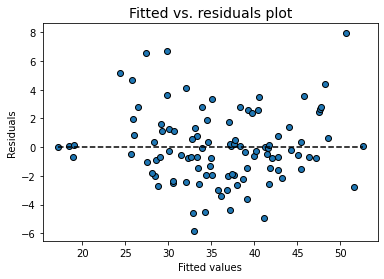

In [23]:
m.fitted_vs_residual()

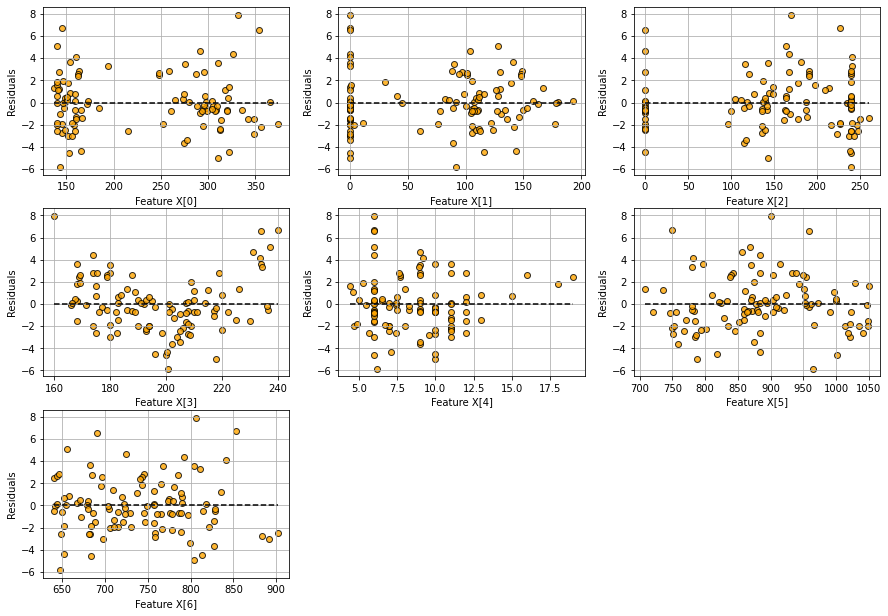

In [24]:
m.fitted_vs_features()

### Histogram and Q-Q plot of the standardized residuals

From the shape of the histogram, we can judge if the residuals (estimate of original error terms) follow a Normal distribution. Q-Q plot also gives this information. If the Q-Q plot deviates too much from the theoretical 45 degree line, then Normality assumption is violated.

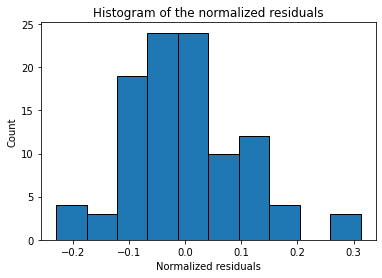

In [25]:
m.histogram_resid()

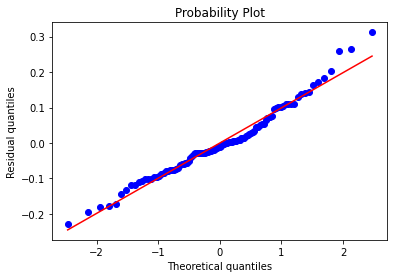

In [26]:
m.qqplot_resid()

### F-test of overall significance

In [27]:
m.ftest()

(117.9826052868479, 5.444633963387394e-44)

### Standard errors, t-statistic, p-values

We get all the standard error, t-statistic, and p-values at once. Based on this list, we can say that following predictors do not have statistical significance in the current model,

- Slag
- SP
- Fine Aggr

Why? Because their p-values are > 0.05 and therefore we cannot reject the NULL hypothesis that their true (population) values are actually zero. Note, the first row in the methods corresponds to the intercept of the model, so we show the index from 1 while considering the actual predictors.

In [28]:
print("Standard errors:",m.std_err())
print()
print("t-test values:",m.tvalues())
print()
print("P-values:",m.pvalues())

Standard errors: [7.11012816e+01 2.28219635e-02 3.17622461e-02 2.31579095e-02
 7.16597987e-02 1.34585819e-01 2.74392419e-02 2.88230698e-02]

t-test values: [ 1.96594909  2.6909702  -0.93530928  2.18180809 -3.24721883  0.76642483
 -2.02708348 -1.35595788]

P-values: [0.0522238  0.00841856 0.35200038 0.03159057 0.00161093 0.44532388
 0.04545594 0.17832696]


In [29]:
for i in range(7):
    print(f"Predictor: {df.columns[i]}, Standard error: {m.std_err()[i+1]}, t-statistic: {m.tvalues()[i+1]}, p-value: {m.pvalues()[i+1]}")
    print()

Predictor: Cement, Standard error: 0.02282196349297464, t-statistic: 2.6909701980576384, p-value: 0.008418555802794098

Predictor: Slag, Standard error: 0.03176224609957067, t-statistic: -0.9353092790986913, p-value: 0.352000379099192

Predictor: Fly ash, Standard error: 0.023157909546225493, t-statistic: 2.1818080877305412, p-value: 0.031590565330084704

Predictor: Water, Standard error: 0.0716597986788846, t-statistic: -3.2472188311451555, p-value: 0.0016109346748200267

Predictor: SP, Standard error: 0.13458581945999643, t-statistic: 0.7664248331314913, p-value: 0.4453238786890463

Predictor: Coarse Aggr., Standard error: 0.027439241862754322, t-statistic: -2.027083481291082, p-value: 0.04545593810359152

Predictor: Fine Aggr., Standard error: 0.02882306977428674, t-statistic: -1.355957876649231, p-value: 0.17832696427097



### We can print the confidence interval of the regression coefficients directly

Note carefully, the 2nd, 5th, and 7th rows have ranges which include zero. That means the 95% confidence interval include zero i.e. we cannot reject the NULL hypothesis that these coefficients are actually zero, and therefore have no impact on the response variable. The first row corresponds to the intercept of the model, so we show the index from 1 while considering the actual predictors.

These are the same variables - Slag, SP, and Fine Aggr., which showed p-values > 0.05.

In [30]:
m.conf_int()[1:]

array([[ 0.0161059 ,  0.10672055],
       [-0.09276355,  0.03334851],
       [ 0.00455185,  0.09650038],
       [-0.37495773, -0.09043236],
       [-0.16403672,  0.37033655],
       [-0.11009542, -0.00114785],
       [-0.0963039 ,  0.01813816]])

### If we change the statistical significance level to 0.01 from 0.05, then two more variables show range including zero

In [31]:
m.conf_int(alpha=0.01)[1:]

array([[ 0.00142397,  0.12140248],
       [-0.11319699,  0.05378194],
       [-0.0103462 ,  0.11139843],
       [-0.42105825, -0.04433184],
       [-0.2506191 ,  0.45691892],
       [-0.12774776,  0.01650449],
       [-0.11484649,  0.03668075]])

### Now, we can build a model removing those three variables who showed p-val > 0.05

In [32]:
m2 = mlr()

In [33]:
predictors = ['Cement', 'Fly ash', 'Water', 'Coarse Aggr.']

In [34]:
m2.fit_dataframe(X=predictors,y=response,dataframe=df)

In [35]:
print("Metrics of the old (full) model\n"+"-"*40)
m.print_metrics()

Metrics of the old (full) model
----------------------------------------
sse:     646.4840
sst:     6266.6636
mse:     6.2765
r^2:     0.8968
adj_r^2: 0.8892
AIC:     497.4937
BIC:     518.5716


In [36]:
print("Metrics of the new (smaller) model\n"+"-"*40)
m2.print_metrics()

Metrics of the new (smaller) model
----------------------------------------
sse:     726.4008
sst:     6266.6636
mse:     7.0524
r^2:     0.8841
adj_r^2: 0.8794
AIC:     503.4988
BIC:     516.6724


### We can also plot something called Cook's distance plot to see if there is any outliers in the data

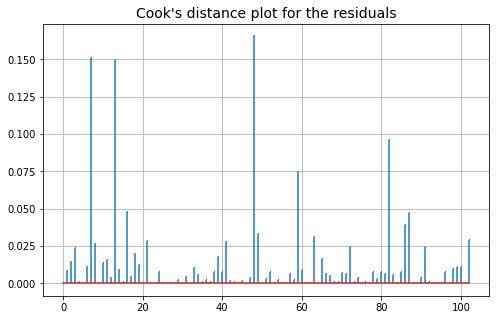

In [37]:
m.cook_distance()

### We can plot the full pairwise scatterplots

This may take a little time. Have patience...


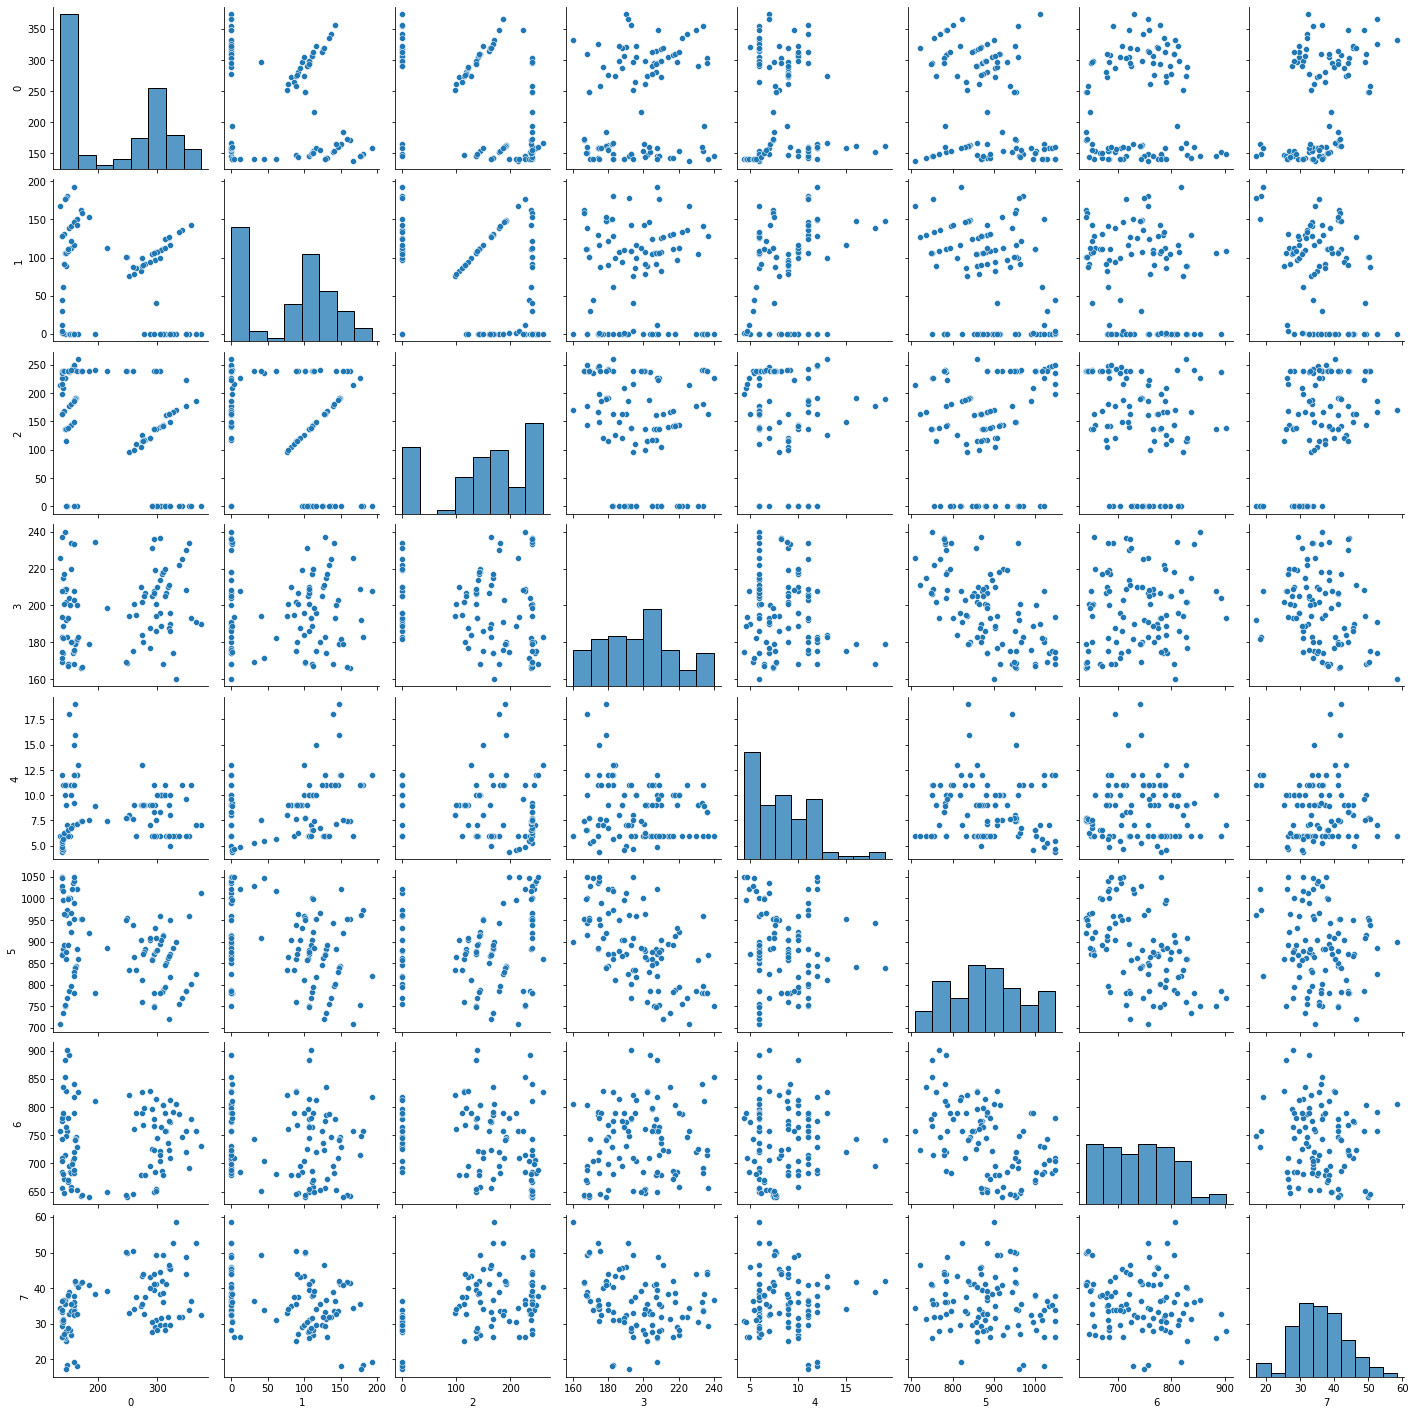

In [38]:
m.pairplot()

### You can also use Seaborn library for visualization like pairplots and correlation heatmaps

In [39]:
import seaborn as sns

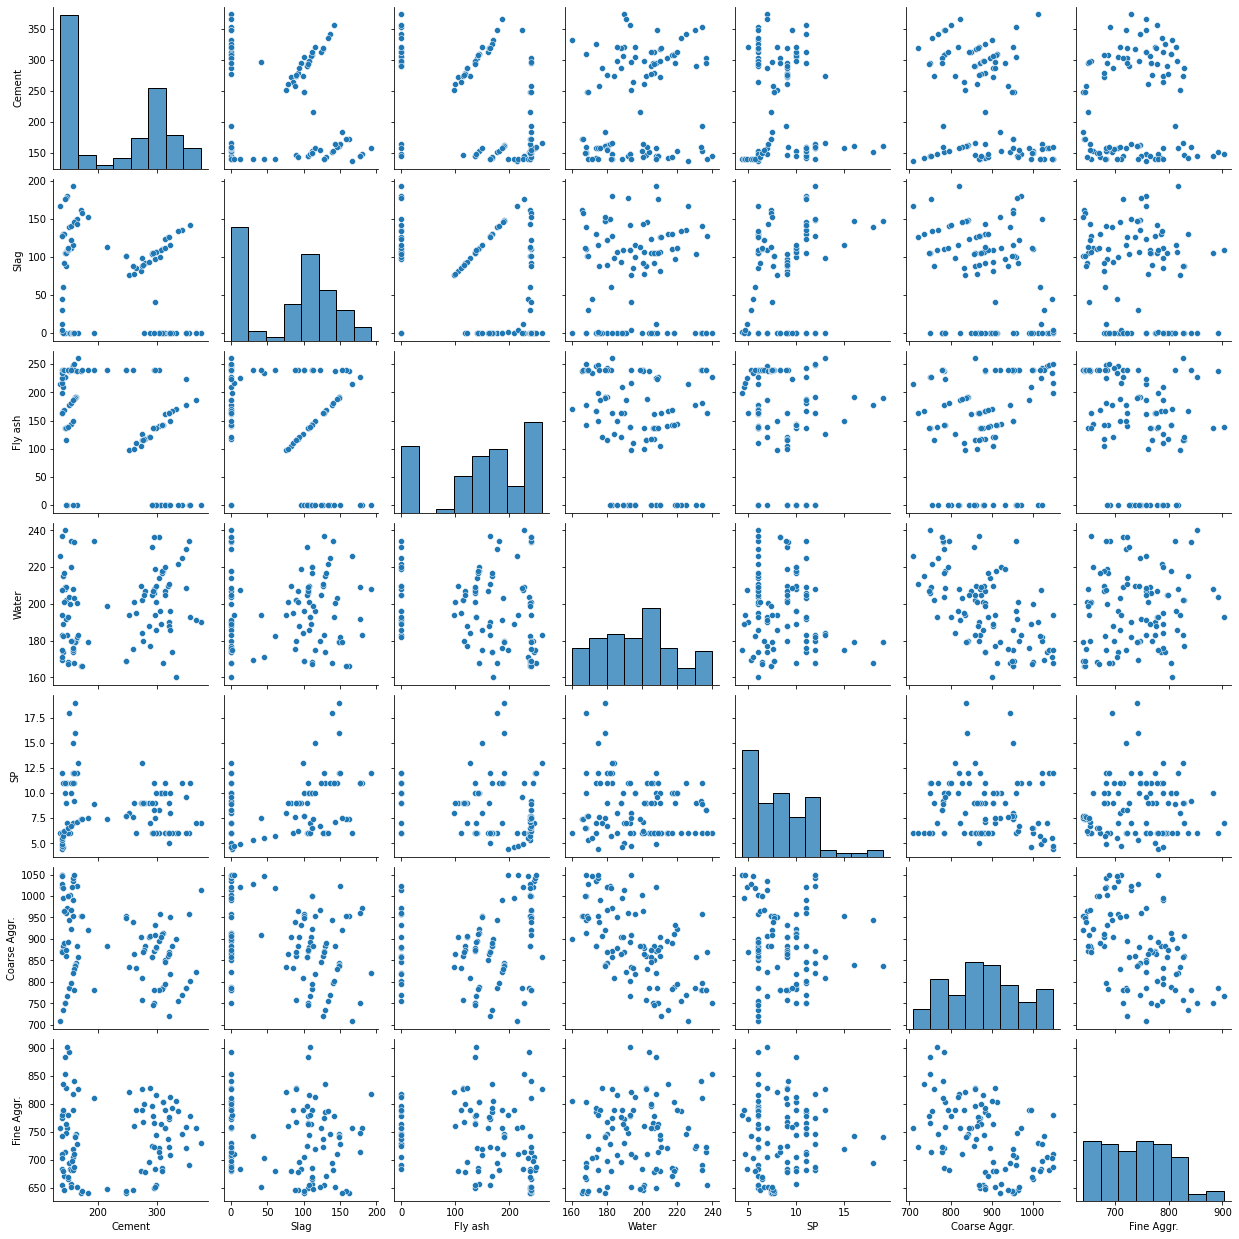

In [40]:
sns.pairplot(data=df[df.columns[:7]])

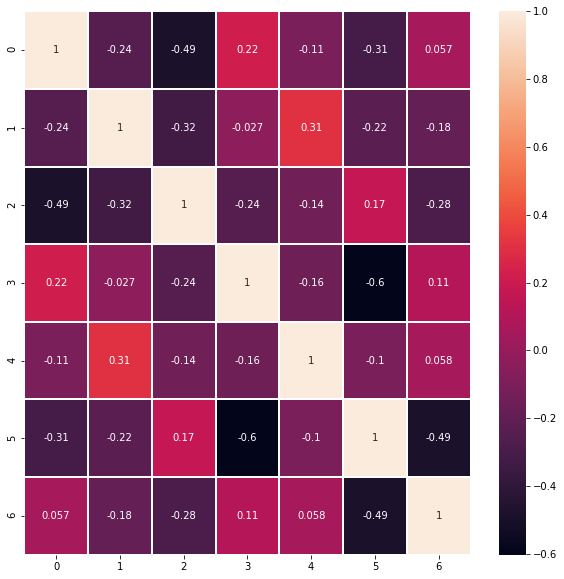

In [41]:
corr = np.corrcoef(df[df.columns[:7]],rowvar=False)
plt.figure(figsize=(10,10))
sns.heatmap(data=corr,linewidths=1,annot=True)